In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
diabetes = datasets.load_diabetes(as_frame = True)

In [2]:
df = pd.DataFrame(diabetes['data'], columns=diabetes.feature_names)
df['target'] = diabetes['target']
df
# load dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
correlation_matrix = df.corr()
print(correlation_matrix)
# Create a correlation matrix to see relationships between variables

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

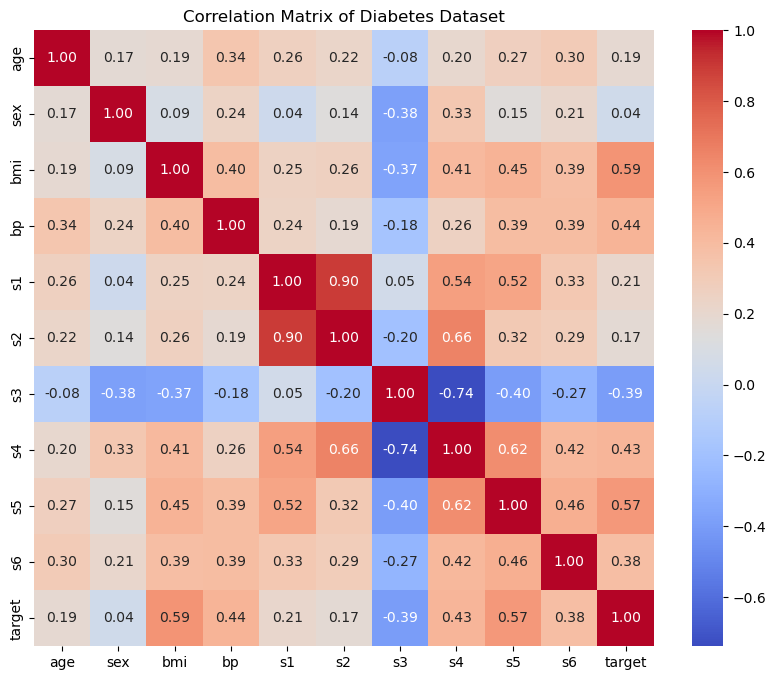

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()
# display the Correlation Matrix using a heatmap

In [5]:
target_corr = correlation_matrix['target'].sort_values(ascending=False)
top_features = target_corr[1:5]
print("Top 4 features:")
# find the four features that are most correlated with the target
print(top_features)

Top 4 features:
bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
Name: target, dtype: float64


In [6]:
print(df.isnull().sum()) # check for any missing data values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [7]:
df['target_binary'] = np.where(df['target'] > 140, 1, 0) # Binarize the target values with a threshold of 140

df = df.filter(items = ["bmi", "s5", "bp", "s4", "target", "target_binary"]) # Keep only the four most important features
X = df.drop(columns=['target', 'target_binary'])
y = df['target_binary']

# Split the dataset (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the datasets
print(X_train.shape, X_val.shape, X_test.shape)

(265, 4) (88, 4) (89, 4)


In [8]:
# transform continuous features into categorical features with 5 categories each using KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = kbins.fit_transform(X_train)
X_val_binned = kbins.transform(X_val)
X_test_binned = kbins.transform(X_test)
X_train_binned = pd.DataFrame(X_train_binned, columns=X.columns)
X_val_binned = pd.DataFrame(X_val_binned, columns=X.columns)
X_test_binned = pd.DataFrame(X_test_binned, columns=X.columns)

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Use Gaussian Naive Bayes to predict the target values for the testing set
y_test_pred_gnb = gnb.predict(X_test)
y_val_pred_gnb = gnb.predict(X_val)

# Print a classification report, confusion matrix, and overall accuracy of GNB based on the testing set
gnb_test_accuracy = accuracy_score(y_test, y_test_pred_gnb)
gnb_val_accuracy = accuracy_score(y_val, y_val_pred_gnb)
print("Classification Report for GNB:\n", classification_report(y_test, y_test_pred_gnb))
print("Confusion Matrix for GNB:\n", confusion_matrix(y_test, y_test_pred_gnb))
print("GNB Testing Accuracy:", gnb_test_accuracy)

# calculated a variance value using the difference between the accuracy of the model with the validation set and the accuracy of
# the model with the testing set
gnb_variance = abs(gnb_test_accuracy - gnb_val_accuracy)

Classification Report for GNB:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.80      0.77      0.79        48

    accuracy                           0.78        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.78      0.78      0.78        89

Confusion Matrix for GNB:
 [[32  9]
 [11 37]]
GNB Testing Accuracy: 0.7752808988764045


In [10]:
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
# Use validation set to optimize hyperparameters
y_val_pred_svc = svc.predict(X_val)
accuracy_svc_default = accuracy_score(y_val, y_val_pred_svc)
print("Support Vector Classification Default Accuracy on Validation Set:", accuracy_svc_default)
svc_l = SVC(random_state = 42, kernel = 'linear')
svc_l.fit(X_train, y_train)
y_val_pred_svc = svc_l.predict(X_val)
accuracy_svc_linear = accuracy_score(y_val, y_val_pred_svc)
print("Support Vector Classification Linear Accuracy on Validation Set:", accuracy_svc_linear, "\n")

# Optimized hyperparameters based on the kernel type to be used, compared linear vs default (rbf) using the validation set
# found that the default parameter of using rbf for the kernel yields the highest accuracy

y_test_pred_svc = svc.predict(X_test)

# Print a classification report, confusion matrix, and overall accuracy of SVC based on the testing set
svc_test_accuracy = accuracy_score(y_test, y_test_pred_svc)
print("Classification Report for SVC:\n", classification_report(y_test, y_test_pred_svc))
print("Confusion Matrix for SVC:\n", confusion_matrix(y_test, y_test_pred_svc))
print("Support Vector Classification Accuracy on Testing Set:", svc_test_accuracy)
# calculated a variance value using the difference between the accuracy of the model with the validation set and the accuracy of
# the model with the testing set
svc_variance = abs(svc_test_accuracy - accuracy_svc_default)

Support Vector Classification Default Accuracy on Validation Set: 0.8181818181818182
Support Vector Classification Linear Accuracy on Validation Set: 0.7954545454545454 

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        41
           1       0.78      0.73      0.75        48

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89

Confusion Matrix for SVC:
 [[31 10]
 [13 35]]
Support Vector Classification Accuracy on Testing Set: 0.7415730337078652


In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_binned, y_train)

# Use the trained DT model to make predictions for the testing set
y_test_pred_dt = dt.predict(X_test_binned)
y_val_pred_dt = dt.predict(X_val_binned)
dt_test_accuracy = accuracy_score(y_test, y_test_pred_dt)
val_accuracy = accuracy_score(y_val, y_val_pred_dt)
# Print a classification report, confusion matrix, and overall accuracy of Decision Tree Classifier based on the testing set
print("Classification Report for DT:\n", classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix for DT:\n", confusion_matrix(y_test, y_test_pred_dt))
print("Decision Tree Classifier Accuracy:", dt_test_accuracy)
# calculated a variance value using the difference between the accuracy of the model with the validation set and the accuracy of
# the model with the testing set
dt_variance = abs(dt_test_accuracy - val_accuracy)

Classification Report for DT:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        41
           1       0.74      0.60      0.67        48

    accuracy                           0.67        89
   macro avg       0.68      0.68      0.67        89
weighted avg       0.69      0.67      0.67        89

Confusion Matrix for DT:
 [[31 10]
 [19 29]]
Decision Tree Classifier Accuracy: 0.6741573033707865


In [12]:
# used validation set to optimize k parameter, found that k = 20 yields the highest accuracy
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_binned, y_train)
y_val_pred_knn = knn5.predict(X_val_binned)
accuracy_knn5 = accuracy_score(y_val, y_val_pred_knn)
print("5-Nearest Neighbors Accuracy:", accuracy_knn5)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train_binned, y_train)
y_val_pred_knn = knn10.predict(X_val_binned)
accuracy_knn10 = accuracy_score(y_val, y_val_pred_knn)
print("10-Nearest Neighbors Accuracy:", accuracy_knn10)

knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train_binned, y_train)
y_val_pred_knn = knn15.predict(X_val_binned)
accuracy_knn15 = accuracy_score(y_val, y_val_pred_knn)
print("15-Nearest Neighbors Accuracy:", accuracy_knn15)



# predicted test outputs and printed results using a classification report, confusion matrix, and overall accuracy
y_test_pred_knn = knn15.predict(X_test_binned)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Classification Report for KNN:\n", classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_test_pred_knn))
print("K-Nearest Neighbors Testing Accuracy:", accuracy_knn)

# calculated a variance value using the difference between the accuracy of the model with the validation set and the accuracy of
# the model with the testing set

knn_variance = abs(accuracy_knn - accuracy_knn15)

5-Nearest Neighbors Accuracy: 0.7159090909090909
10-Nearest Neighbors Accuracy: 0.7840909090909091
15-Nearest Neighbors Accuracy: 0.7727272727272727
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.79      0.77      0.78        48

    accuracy                           0.76        89
   macro avg       0.76      0.76      0.76        89
weighted avg       0.76      0.76      0.76        89

Confusion Matrix for KNN:
 [[31 10]
 [11 37]]
K-Nearest Neighbors Testing Accuracy: 0.7640449438202247


In [13]:
print("GNB Variance: " , gnb_variance)
print("SVC Variance: " , svc_variance)
print("DT Variance: " , dt_variance)
print("KNN Variance: " , knn_variance)
# printed variance estimates of all models for comparison

GNB Variance:  0.03153728294177727
SVC Variance:  0.07660878447395303
DT Variance:  0.030388151174668088
KNN Variance:  0.00868232890704801


In [14]:
print("GNB Accuracy: ", gnb_test_accuracy)
print("SVC Accuracy: ", svc_test_accuracy)
print("DT Accuracy: ", dt_test_accuracy)
print("KNN Accuracy: ", accuracy_knn)
# printed accuracies of all models for comparison

GNB Accuracy:  0.7752808988764045
SVC Accuracy:  0.7415730337078652
DT Accuracy:  0.6741573033707865
KNN Accuracy:  0.7640449438202247


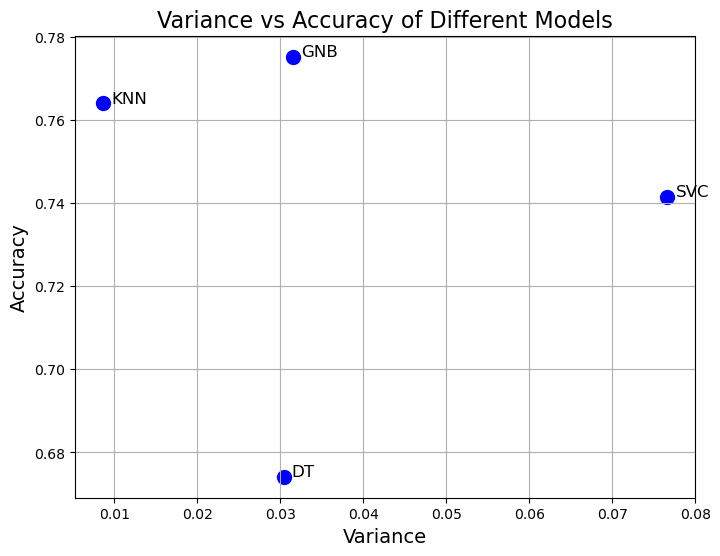

In [15]:
models = ['GNB', 'SVC', 'DT', 'KNN']

accuracies = [gnb_test_accuracy, svc_test_accuracy, dt_test_accuracy, accuracy_knn]

variances = [gnb_variance, svc_variance, dt_variance, knn_variance]
plt.figure(figsize=(8,6))
plt.scatter(variances, accuracies, color='blue', s=100)
for i, model in enumerate(models):
    plt.text(variances[i] + 0.001, accuracies[i], model, fontsize=12)
plt.xlabel('Variance', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Variance vs Accuracy of Different Models', fontsize=16)

plt.grid(True)
plt.show()

# Plotted the models to show their estimated variance and accuracy for comparison
# KNN, in the top left corner, performed the best overall
# DT had the worst accuracy
# SVC had the worst variance